# Hopfield Networks

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.array([
    [-1, 1, 1, 1, -1],
    [1, -1, -1, -1, 1],
    [1, 1, 1, 1, 1],
    [1, -1, -1, -1, 1],
    [1, -1, -1, -1, 1],
])

Z = np.array([
    [1, 1, 1, 1, 1],
    [-1, -1, -1, 1, -1],
    [-1, -1, 1, -1, - 1],
    [-1, 1, -1, -1, -1],
    [1, 1, 1, 1, 1],
])

In [79]:
A_noise = np.array([
    [-1, -1,  -1,  1, -1],
    [1, -1, -1, 1,  1],
    [1,  1,  -1,  -1,  1],
    [-1, -1, 1, -1,  1],
    [1, -1, -1, 1,  1],
])

A_noise_2 = np.array([
    [1, 1,  1,   1,  1],
    [1, -1, -1, -1,  1],
    [1,  -1,-1, -1,  1],
    [1, -1, -1, -1,  1],
    [1, 1, 1, 1,     1],
])

In [59]:
A_random = np.identity(5)

In [7]:
def outer(matrixA, matrixB):
    result = []
    for row_A in matrixA:
        result_row = []
        for column_A in row_A:
            product = []
            for row_B in matrixB:
                product_row = []
                for column_B in row_B:
                    product_row.append(column_A * column_B)
                product.append(product_row)

            result_row.append(product)
        result.append(result_row)

    return result
            

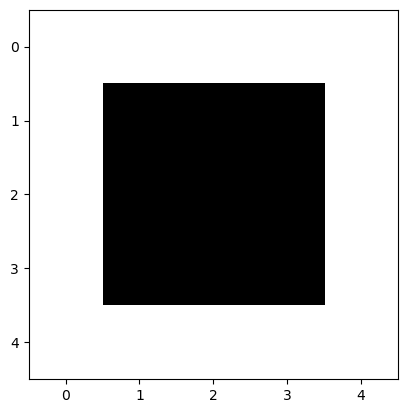

In [65]:
plt.imshow(A_noise_2, cmap="Greys")

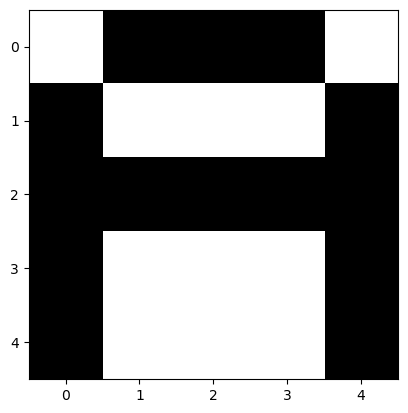

In [12]:
plt.imshow(A, cmap='Greys')

In [81]:
def add_noise(x_, noise_level=.2):
    noise = np.random.choice(
        [1, -1], size=len(x_), p=[1-noise_level, noise_level])
    return x_ * noise

In [74]:
def update(input, weights):
    updated = []
    for i,row in enumerate(input):
        updated_row = []
        for j, column in enumerate(row):
            # Determining the correct firing of 1 cell

            votes = []

            for weight_i, weight_row in enumerate(weights):
                for weight_j, weight_col in enumerate(weight_row):
                   votes.append(input[weight_i][weight_j] * weight_col[i][j])
                   
            if np.sum(votes) >= 0:
                updated_row.append(1)
            else:
                updated_row.append(-1)

        updated.append(updated_row)
    return updated
        

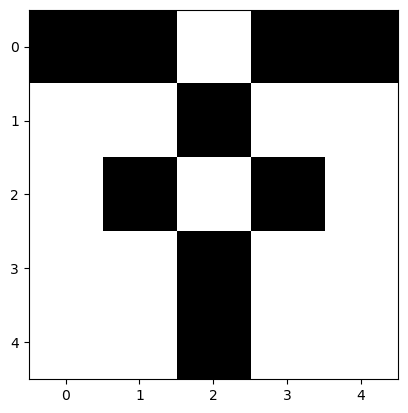

In [95]:
A_auto_noise = add_noise(A, noise_level=0.5)

plt.imshow(A_auto_noise, cmap="Greys")

In [75]:
weights = outer(A, A)

In [98]:
weights

[[[[1, -1, -1, -1, 1],
   [-1, 1, 1, 1, -1],
   [-1, -1, -1, -1, -1],
   [-1, 1, 1, 1, -1],
   [-1, 1, 1, 1, -1]],
  [[-1, 1, 1, 1, -1],
   [1, -1, -1, -1, 1],
   [1, 1, 1, 1, 1],
   [1, -1, -1, -1, 1],
   [1, -1, -1, -1, 1]],
  [[-1, 1, 1, 1, -1],
   [1, -1, -1, -1, 1],
   [1, 1, 1, 1, 1],
   [1, -1, -1, -1, 1],
   [1, -1, -1, -1, 1]],
  [[-1, 1, 1, 1, -1],
   [1, -1, -1, -1, 1],
   [1, 1, 1, 1, 1],
   [1, -1, -1, -1, 1],
   [1, -1, -1, -1, 1]],
  [[1, -1, -1, -1, 1],
   [-1, 1, 1, 1, -1],
   [-1, -1, -1, -1, -1],
   [-1, 1, 1, 1, -1],
   [-1, 1, 1, 1, -1]]],
 [[[-1, 1, 1, 1, -1],
   [1, -1, -1, -1, 1],
   [1, 1, 1, 1, 1],
   [1, -1, -1, -1, 1],
   [1, -1, -1, -1, 1]],
  [[1, -1, -1, -1, 1],
   [-1, 1, 1, 1, -1],
   [-1, -1, -1, -1, -1],
   [-1, 1, 1, 1, -1],
   [-1, 1, 1, 1, -1]],
  [[1, -1, -1, -1, 1],
   [-1, 1, 1, 1, -1],
   [-1, -1, -1, -1, -1],
   [-1, 1, 1, 1, -1],
   [-1, 1, 1, 1, -1]],
  [[1, -1, -1, -1, 1],
   [-1, 1, 1, 1, -1],
   [-1, -1, -1, -1, -1],
   [-1, 1, 1, 1, -1],

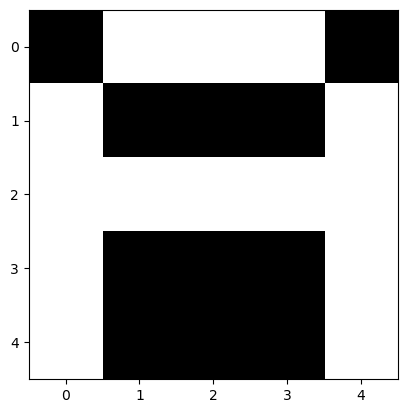

In [96]:
A_updated = update(A_auto_noise, weights)
plt.imshow(A_updated, cmap="Greys")

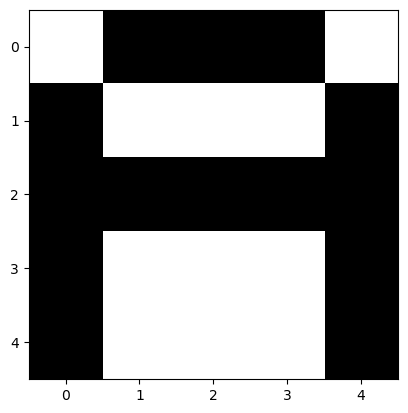

In [27]:
plt.imshow(A, cmap="Greys")

In [99]:
np.dot([1,2,3], [[3,-1,1],[0,1,0],[2,1,3]])

array([ 9,  4, 10])

## Resistance to weight corruptability

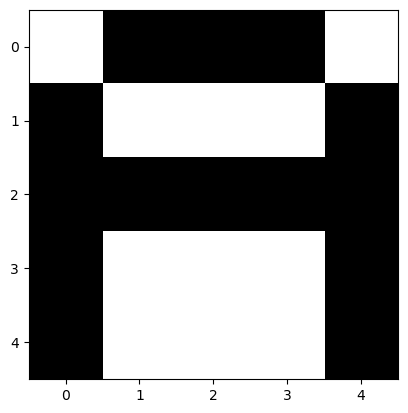

In [250]:
noisy_weights = add_noise(weights, 0.10)
A_updated = update(A_noise, noisy_weights)
plt.imshow(A_updated, cmap="Greys")

## Answer

https://colab.research.google.com/github/qihongl/demo-hopfield-network/blob/master/hopfield-net.ipynb#scrollTo=FTDRVplQv41U